In [2]:
import tensorflow as tf 
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(228.88904, shape=(), dtype=float32)


In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [4]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

Num samples class_0 2216
Num samples class_1 2250


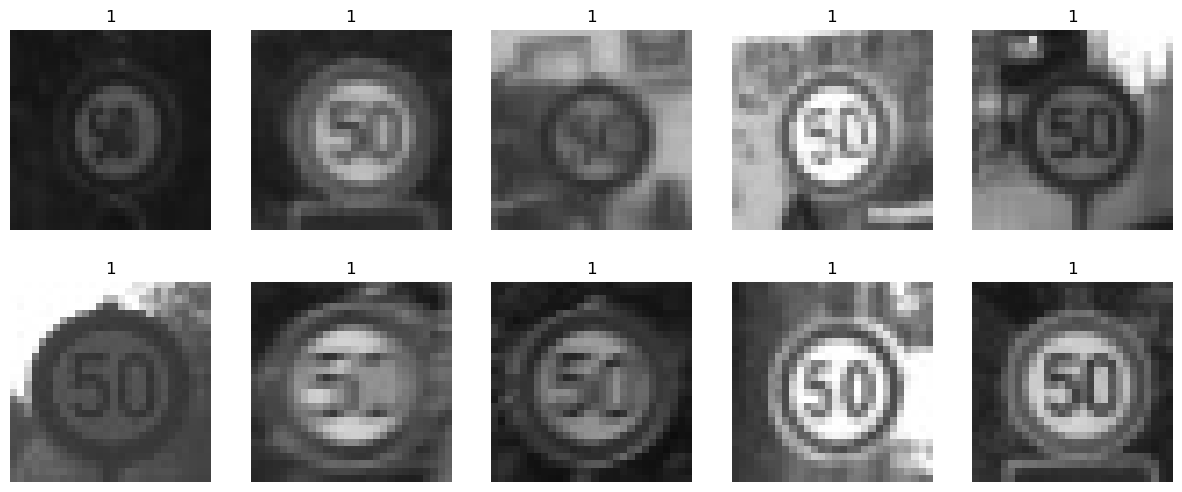

In [5]:
folder = 'D:/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

In [6]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4466, 28, 28)
Labels (4466,)


In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4466, 784)
Elapsed time 0.02898240089416504


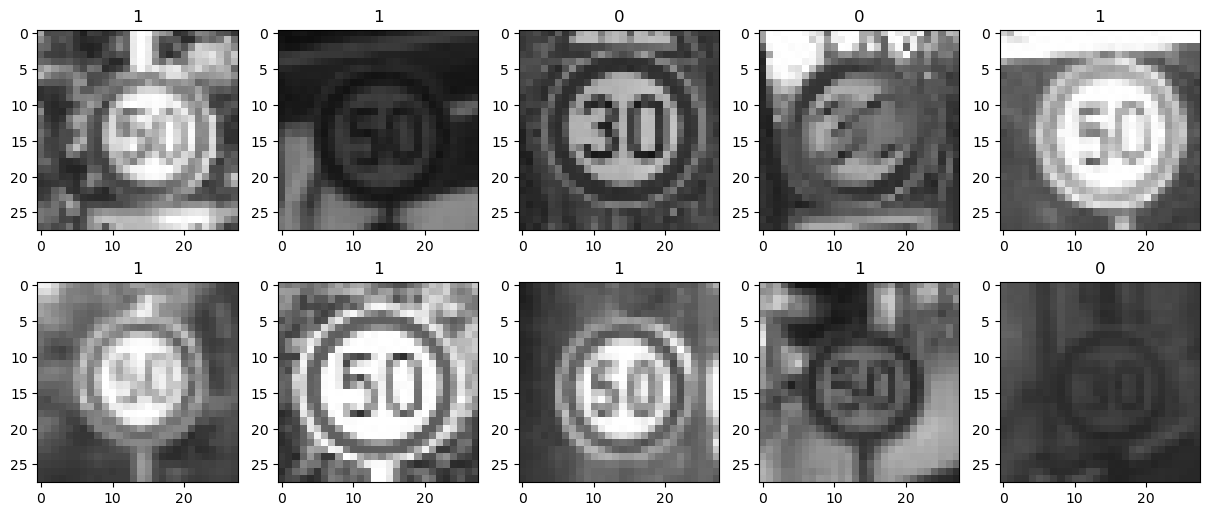

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])
    

### Building the Neural Network

In [9]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [92]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(100, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer ='adam', loss ='mean_squared_error')

In [94]:
#tf.convert_to_tensor(X_train, dtype=tf.float32)

In [95]:
#import tensorflow as tf
#from tensorflow.python.client import device_lib

#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#device_lib.list_local_devices()

In [153]:
import tensorflow as tf
history = model.fit(pixels, labels, epochs=5000, batch_size=1024)

Epoch 1/5000
5/5 [==============================] - 0s 10ms/step - loss: 0.0538
Epoch 2/5000
5/5 [==============================] - 0s 5ms/step - loss: 0.0540
Epoch 3/5000
5/5 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 4/5000
5/5 [==============================] - 0s 10ms/step - loss: 0.0537
Epoch 5/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0535
Epoch 6/5000
5/5 [==============================] - 0s 5ms/step - loss: 0.0542
Epoch 7/5000
5/5 [==============================] - 0s 6ms/step - loss: 0.0548
Epoch 8/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0537
Epoch 9/5000
5/5 [==============================] - 0s 5ms/step - loss: 0.0538
Epoch 10/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0541
Epoch 11/5000
5/5 [==============================] - 0s 5ms/step - loss: 0.0552
Epoch 12/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0559
Epoch 13/5000
5/5 [============================

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

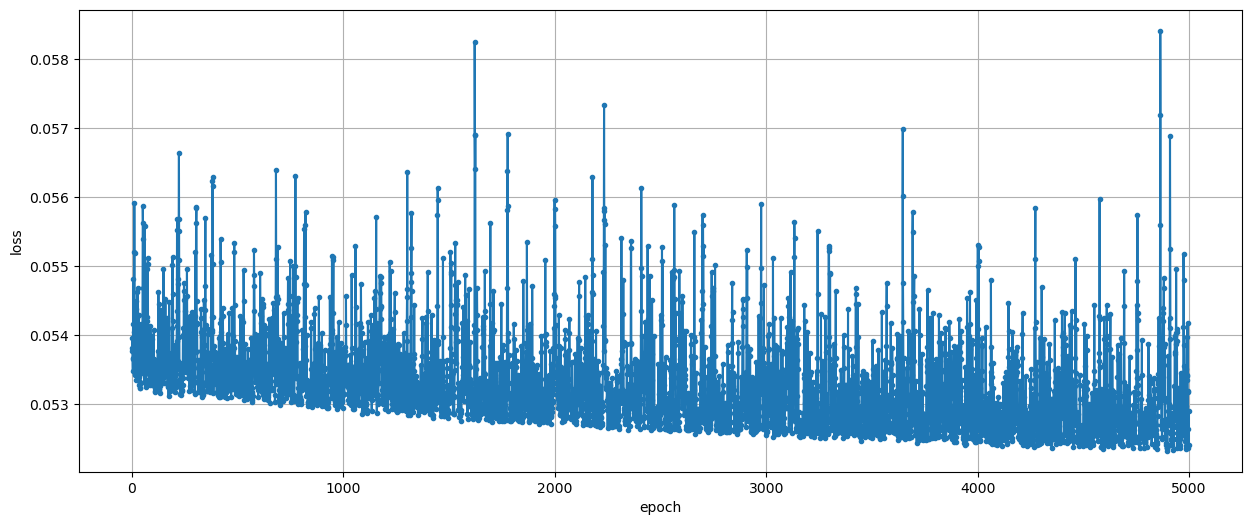

In [154]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.5224808  0.5219606  0.52228063 0.5223556  0.5220433  0.52194715
 0.5215284  0.5218741  0.5219876  0.52208406 0.52205807 0.5222568
 0.5221102  0.52184784 0.52209586 0.5219645  0.52218074 0.5222807
 0.5220881  0.521936   0.52243286 0.5220828  0.5219351  0.52247244
 0.521667   0.5220842  0.5219624  0.5221046  0.5221606  0.52201116
 0.52194464 0.52201736 0.5222942  0.5224025  0.52197033 0.5223083
 0.52241355 0.52199006 0.52210736 0.522067   0.5220747  0.5221384
 0.52233154 0.5221283  0.5218079  0.5220337  0.52226853 0.5219991
 0.52210164 0.5223662  0.5220688  0.5220052  0.52209044 0.52206117
 0.5216847  0.5223134  0.52190924 0.5221117  0.5222368  0.5220386
 0.5218755  0.5220337  0.52210987 0.5219923  0.52254856 0.52223027
 0.5224085  0.5222619  0.521997   0.5223451  0.5220187  0.52242494
 0.5220226  0.52238077 0.5222871  0.5222864  0.52191854 0.52225095
 0.5221202  0.5220916  0.5224177  0.5220115  0.5222481  0.5219932
 0.522005   0.52215594 0.5220924  0.52204776 0.5221024  0.52167094
 0

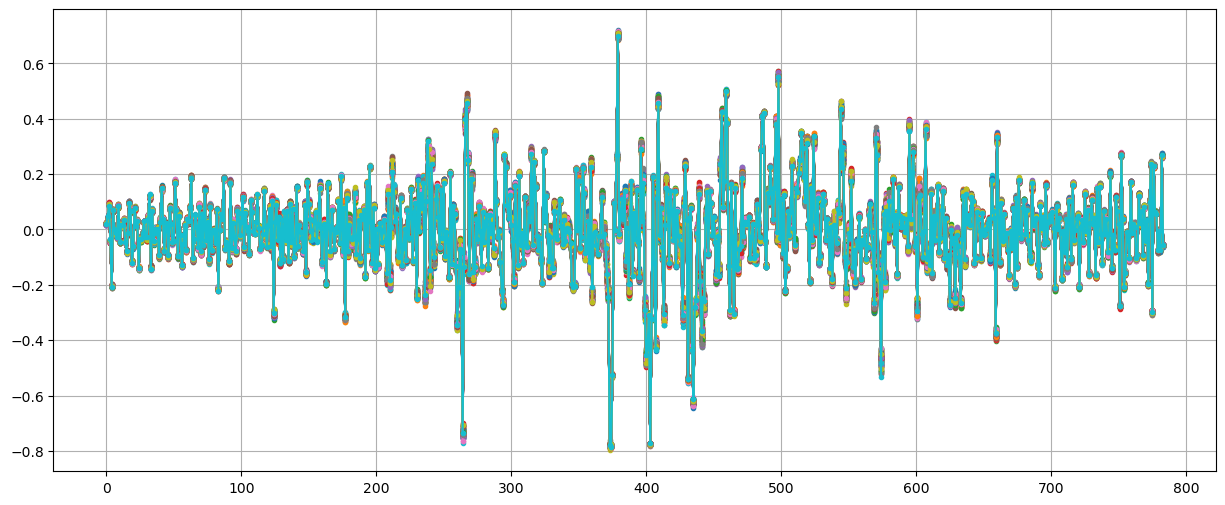

In [155]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

### Performance Evaluation

In [156]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 39ms/step
[[0.11985138 0.11871341 0.11613023 0.11554304 0.11096713 0.11813349
  0.11909109 0.12486932 0.11528909 0.11581886 0.11923906 0.12093592
  0.11225909 0.11657113 0.12155044 0.11736664 0.11614543 0.1116727
  0.11537549 0.11808741 0.11724445 0.11882523 0.12025598 0.11501861
  0.11493659 0.11292344 0.12048796 0.11708421 0.11001989 0.11765367
  0.1143108  0.1152913  0.11627504 0.11932316 0.11509907 0.11461204
  0.11937431 0.11628336 0.11401331 0.11828265 0.11528665 0.11928913
  0.11524218 0.11389744 0.11693448 0.11847869 0.12168175 0.11541545
  0.11892968 0.11068228 0.11901835 0.1195713  0.11947846 0.1227451
  0.11264095 0.11608988 0.1171363  0.11424482 0.11833358 0.11622316
  0.11781281 0.11475894 0.11553481 0.11734349 0.11116654 0.11112711
  0.11408168 0.11684328 0.11631373 0.1166366  0.11752659 0.11649838
  0.11844635 0.11701819 0.11700258 0.11648458 0.11154062 0.11310667
  0.11909348 0.11869645 0.11761302 0.11291692 0.11470073 0.1125572

In [157]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 1ms/step


In [158]:
correct = 0
for prediction, label in zip(predictions, labels):
    if (prediction == label).all():
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9827586206896551


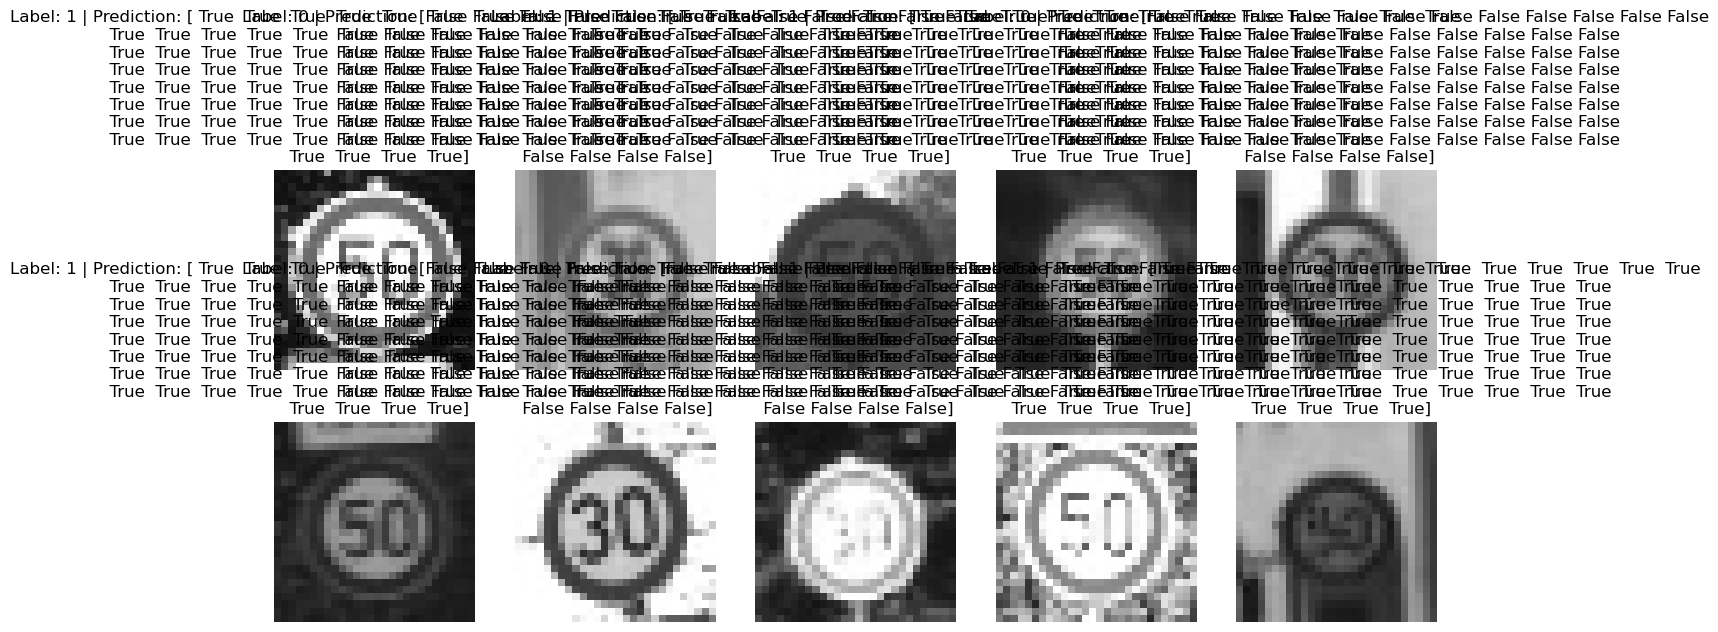

In [159]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

#### How many images are there for each class?
In class 0 there are 2216 images, also in class_1 there are 2250 images

#### What accuracy can you achieve?
With one single neuron i achieved the value of Accuracy = 0.967756381549485

#### What is the maximum accuracy you can achieve?
Maximum accuracy that i have achieved =  0.9746977160770264